顔の座標 =  305 134 232 232


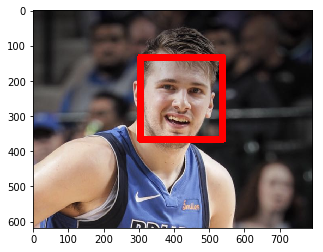

In [1]:
import matplotlib.pyplot as plt
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("hoge.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

if len(face_list) == 0:
    print("failed")
    quit()

for (x, y, w, h) in face_list:
    print("顔の座標 = ", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
    
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
    

In [1]:
import cv2

def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

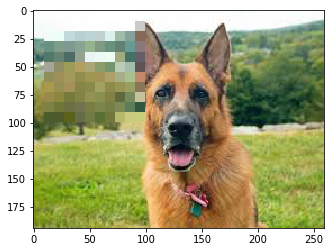

In [9]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("dog.jpeg")
mos = mosaic(img, (10, 10, 100, 100), 10)

cv2.imwrite("dog-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

顔の座標 =  305 134 232 232


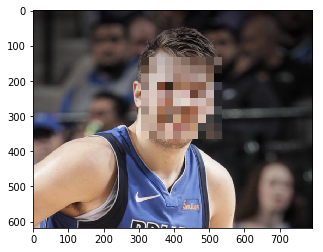

In [10]:
import matplotlib.pyplot as plt
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("hoge.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

if len(face_list) == 0:
    print("failed")
    quit()

for (x, y, w, h) in face_list:
    print("顔の座標 = ", x, y, w, h)
    img = mosaic(img, (x, y, x+w, y+h), 10)
    
cv2.imwrite("hoge-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
    

---0---
顔の座標 =  305 134 232 232
---10---
顔の座標 =  342 198 228 228
---20---
顔の座標 =  364 252 220 220
---30---
顔の座標 =  368 289 234 234
---40---
---50---
---60---
---70---
---80---


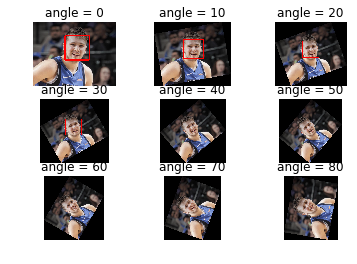

In [18]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("hoge.png")

def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
    
    for (x, y, w, h) in face_list:
        print("顔の座標 = ", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=10)

for i in range(0, 9):
    ang = i * 10
    print("---"+ str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.title("angle = " + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()